In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('week2/housing.csv')

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.dtypes


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

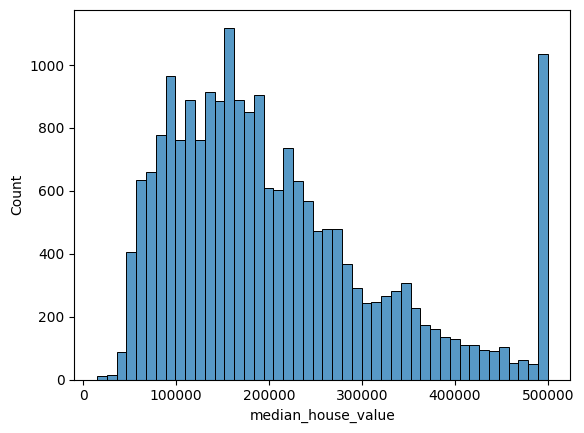

In [7]:
sns.histplot(df.median_house_value)

In [8]:
df_data = df.copy()

In [9]:
del df_data['ocean_proximity']

In [10]:
df_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0

# Qn: 1

In [11]:
df_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Qn: 2

In [12]:
df_data['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [13]:
n = len(df_data)

In [14]:
n

20640

In [29]:

idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [31]:
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [33]:
df_full_data= df_data.iloc[idx[:n]]
df_full_data = df_full_data.reset_index(drop=True)
df_full_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.01     36.06                25.0       1505.0             NaN   
1        -119.46     35.14                30.0       2943.0             NaN   
2        -122.44     37.80                52.0       3830.0             NaN   
3        -118.72     34.28                17.0       3051.0             NaN   
4        -121.93     36.62                34.0       2351.0             NaN   
...          ...       ...                 ...          ...             ...   
20635    -117.96     33.78                35.0       1330.0           201.0   
20636    -117.43     34.02                33.0       3084.0           570.0   
20637    -118.38     34.03                36.0       2101.0           569.0   
20638    -121.96     37.58                15.0       3575.0           597.0   
20639    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  median_house_value  
0          1392.0       359.0         1.6812             47700.0  
1          1565.0       584.0         2.5313             45800.0  
2          1310.0       963.0         3.4801            500001.0  
3          1705.0       495.0         5.7376            218600.0  
4          1063.0       428.0         3.7250            278000.0  
...           ...         ...            ...                 ...  
20635       658.0       217.0         6.3700            229200.0  
20636      1753.0       449.0         3.0500             97800.0  
20637      1756.0       527.0         2.9344            222100.0  
20638      1777.0       559.0         5.7192            283500.0  
20639      2619.0      1242.0         2.5755            325000.0  

[20640 rows x 9 columns]

In [34]:
n = len(df_full_data)
n_val  = int (n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

n_val+n_test+n_train

20640

In [35]:
df_train= df_full_data.iloc[idx[:n_train]]
df_val = df_full_data.iloc[idx[n_train:n_train+n_val]]
df_test = df_full_data.iloc[idx[n_train+n_val:]]

In [36]:
df_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -122.59     37.97                46.0       4036.0           856.0   
3024     -119.19     34.23                17.0       3889.0           748.0   
15663    -117.21     33.95                 5.0       8403.0          1240.0   
20484    -122.63     38.96                20.0       2507.0           577.0   
9814     -117.24     34.15                26.0       2041.0           293.0   
...          ...       ...                 ...          ...             ...   
10292    -119.57     36.10                36.0       1729.0           317.0   
16722    -118.33     33.99                44.0       1918.0           387.0   
11730    -117.88     33.70                18.0       2135.0           373.0   
5993     -122.40     37.72                47.0       1167.0           250.0   
15993    -121.26     38.14                10.0       3371.0           665.0   

       population  households  median_income  median_house_value  
20046      1872.0       833.0         4.5625            275200.0  
3024       2415.0       739.0         4.5000            234300.0  
15663      3962.0      1150.0         5.2174            155500.0  
20484      1072.0       457.0         2.3083             60200.0  
9814        936.0       375.0         6.0000            140200.0  
...           ...         ...            ...                 ...  
10292       737.0       278.0         3.5313             68800.0  
16722      1041.0       364.0         2.8542            126500.0  
11730      1464.0       405.0         5.4836            225800.0  
5993        953.0       253.0         4.2727            241900.0  
15993      1823.0       654.0         3.5333            116800.0  

[12384 rows x 9 columns]

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [39]:
y_test

array([11.3504183 , 12.57763965, 11.59543589, ..., 11.65876456,
       12.83361674, 10.95257691])

In [40]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [41]:
df_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.59     37.97                46.0       4036.0           856.0   
1    -119.19     34.23                17.0       3889.0           748.0   
2    -117.21     33.95                 5.0       8403.0          1240.0   
3    -122.63     38.96                20.0       2507.0           577.0   
4    -117.24     34.15                26.0       2041.0           293.0   

   population  households  median_income  
0      1872.0       833.0         4.5625  
1      2415.0       739.0         4.5000  
2      3962.0      1150.0         5.2174  
3      1072.0       457.0         2.3083  
4       936.0       375.0         6.0000

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv= np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
def rmse(y, y_pred): 
    se = (y - y_pred) **2 
    mse= se.mean()
    return np.sqrt(mse)

In [44]:
df_train['total_bedrooms'].values

array([ 856.,  748., 1240., ...,  373.,  250.,  665.])

In [45]:
df_train['total_bedrooms'].describe()

count    12262.000000
mean       539.179742
std        419.044344
min          1.000000
25%        295.000000
50%        435.000000
75%        648.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [46]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [47]:
base = ['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income' ]

In [48]:
base

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [50]:
df_train_0 = df_train.copy()
df_train_mean = df_train.copy()

In [51]:
x_train_0 = df_train_0[base].fillna(0).values

In [52]:
w0, w = train_linear_regression(x_train_0, y_train)

In [53]:
w0

-11.656344589954003

In [54]:
w

array([-2.74957864e-01, -2.79575533e-01,  2.96901022e-03, -3.08573725e-05,
        2.72124602e-04, -1.72139115e-04,  4.73645441e-04,  1.77186117e-01])

In [55]:
y_pred = w0+ x_train_0.dot(w)

In [56]:
y_pred

array([12.5609436 , 12.4116763 , 11.95999026, ..., 12.33448963,
       12.33731975, 11.75067412])

<AxesSubplot:ylabel='Count'>

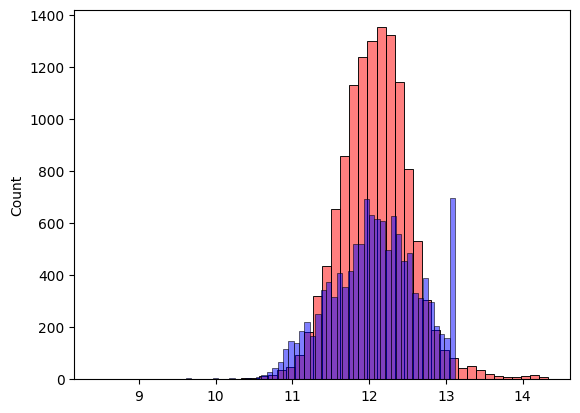

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50 )
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [59]:
score = rmse(y_train, y_pred)
round(score,2)

0.34

In [60]:
def prepare_X(df, fill): 
    df = df.copy()
    features = base.copy()
    
    df_num = df[features]
    df_num = df_num.fillna(fill)
    X = df_num.values
    return X

# Qn: 3

In [61]:
x_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_X(df_val,0)
y_pred= w0+ x_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

In [62]:
x_train = prepare_X(df_train,539.179742)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_X(df_val,539.179742)
y_pred= w0+ x_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

In [63]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])
    XTX_inv= np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [64]:
x_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_reg(x_train, y_train)

x_val = prepare_X(df_val,0)
y_pred= w0+ x_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

# Qn: 4

In [68]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]: 
    w0, w = train_linear_regression_reg(x_train, y_train, r)

    x_val = prepare_X(df_val,0)
    y_pred= w0+ x_val.dot(w)

    score = rmse(y_val, y_pred)
    print (r   , round(score, 2))

0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.35
5 0.35
10 0.35


# Qn: 5

In [83]:
scorelist = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx=np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    n = len(df_full_data)
    n_val  = int (n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test
    
    df_train= df_full_data.iloc[idx[:n_train]]
    df_val = df_full_data.iloc[idx[n_train:n_train+n_val]]
    df_test = df_full_data.iloc[idx[n_train+n_val:]]
    
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    x_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(x_train, y_train)

    x_val = prepare_X(df_val,0)
    y_pred= w0+ x_val.dot(w)

    score = rmse(y_val, y_pred)
    print (s, round(score, 2))
    
    scorelist.append(score);
    
    
    
    
    

0 0.36
1 0.33
2 0.35
3 0.34
4 0.34
5 0.34
6 0.35
7 0.34
8 0.34
9 0.34


In [84]:
scorelist = np.array(scorelist)

In [85]:
np.std(scorelist)

0.006835206336197946

In [86]:
round(np.std(scorelist),3)

0.007

# 6

In [82]:
    idx=np.arange(n)
    np.random.seed(9)
    np.random.shuffle(idx)
    n = len(df_full_data)
    n_val  = int (n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test
    
    df_train= df_full_data.iloc[idx[:n_train]]
    df_val = df_full_data.iloc[idx[n_train:n_train+n_val]]
    df_test = df_full_data.iloc[idx[n_train+n_val:]]
    
    df_train_val = pd.concat([df_train, df_val])
    
    df_train_val = df_train_val.reset_index(drop = True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    y_train_val = np.concatenate([y_train, y_val])
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    x_train = prepare_X(df_train_val, 0)
    w0, w = train_linear_regression_reg(x_train, y_train_val, 0.001)

    x_val = prepare_X(df_test,0)
    y_pred= w0+ x_val.dot(w)

    score = rmse(y_test, y_pred)
   
    
    score
    

0.3287601411973427